<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Introduction to the Central Limit Theorem

_Authors: Matt Brems (DC), Kiefer Katovich (SF), Elaina Hyde (SYD), Justin Pounders (ATL)_

---

### Learning Objectives

- Define and describe sampling distribution.
- Define, describe and compute standard error of the mean.
- Describe the Central Limit Theorem.

### Lesson Guide 
*(for further read at your convenience)*
- [Review of Sample Statistics and Parameters](#review-statistics-parameters)
- [The Central Limit Theorem](#central-limit-theorem)
- [Visualizing the Central Limit Theorem](#visualizing-clt)
- [Standard Error of a Statistic](#standard-error)
- [Additional Resources](#additional-resources)


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid') # this is 1 amongst 5 preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks

%config InlineBackend.figure_format = 'retina' # command to obtain retina-display quality for figures
# %matplotlib inline # no longer needed as plots are included next to code on notebook in latest Python

### Let's move to the visualization segment as the segments prior are just reiterating the same concept covered towards the end of continuous distributions.

<a id='review-statistics-parameters'></a>

### Review: sample statistics and parameters

---

Recall that we use sample statistics to estimate population parameters. Our goal is to calculate sample statistics and then rely on properties of a random sample (and perhaps additional assumptions) to make inferences that we can generalize to the larger population of interest.

Below is a table comparing some example sample statistics and population parameters: 

*(we used mean in our example studied in continuous distributions lesson)*

Metric  | Statistic  | Parameter 
-------- | ---------- | -------- 
mean   | $$\bar{x} = \frac{\sum x}{n}$$ | $$ \mu = \frac{\sum x}{N} $$ |      
standard deviation   | $$ s = \sqrt{\frac{\sum_i (x_i - \bar{x})^2}{n-1}} $$ | $$ \sigma = \sqrt{\frac{\sum_i (x_i - \mu)^2}{N} } $$ |
correlation   | $$ r = \frac{\hat{Cov}(X, Y)}{s_X s_Y} $$ | $$ \rho = \frac{Cov(X, Y)}{\sigma_X \sigma_Y} $$ |

**Population vs sample**: *What's the difference?* [Sample we know is a subset of entire population]

- A population parameter is **constant** and usually **unknown**.
- A sample statistic is **random** but **known**. [like the mean taken from 100 random samples in our continuous dist. lesson]

<a id='central-limit-theorem'></a>

### Central Limit Theorem

---

Normality underlies many of the inferential techniques that we will use in this course. **It is important for us to determine when we've met the condition of normality.**

Consider the random variable $X$. We can take a sample from this population of size $n$ and find the mean of that sample. Let's call this sample mean $x_1$. We can take another sample from this population, also of size $n$, and find the mean of that sample. Let's call this sample mean $x_2$. We can do this over and over until we've calculated the mean of every possible sample of size $n$. If we plotted every sample mean on a histogram, we get another distribution called "the sampling distribution of $\bar{X}$."

**This distribution, the sampling distribution of $\bar{X}$, is Normally distributed even if the distribution of $X$ is not.** (That is, unless some rare conditions are violated). *--> again, as inferred from our last example on continuous dist lesson*

We can formally define [the central limit theorm](http://homepages.math.uic.edu/~bpower6/stat101/Sampling%20Distributions.pdf) like so:

> In probability theory, the central limit theorem states that, **when independent random variables are added, their sum tends toward a normal distribution (commonly known as a bell curve), even if the original variables themselves are not normally distributed**. In more precise terms, given certain conditions, **the arithmetic mean of a sufficiently large number of iterates of independent random variables — each with a well-defined (finite) expected value and finite variance — will be approximately normally distributed**, regardless of the underlying distribution.

Some properties that arise from the central limit theorem include:

> If $X \sim N(\mu,\sigma)$, then $\bar{X}$ is exactly $N(\mu,\frac{\sigma}{\sqrt{n}})$

> If $X$ is not normally distributed, then $\bar{X}$ is approximately $N(\mu,\frac{\sigma}{\sqrt{n}})$ if the sample size $n$ is at least 30. As $n$ increases, $\bar{X}$ becomes asymptotically normally distributed.

> If $\bar{X}$ is normally distributed, then we can use inferential methods that rely on our sample mean, $\bar{x}$

<a id='visualizing-clt'></a>

### Visualizing the Central Limit Theorem: Athlete Salary Data

---

Below is the path to a `.csv` with a variety of data on some highest paid athletes. Many of the variables measured in the data set are *far from normally distributed*. We will show that, despite this fact, the *distribution of sample means* for these variables will be asymptotically (when infinite samples are taken) *normally distributed*, as proven by the Central Limit Theorem.

**We will  now load in the salary data for athletes and extract the total pay information as a variable.**

In [2]:
ath = pd.read_csv('../datasets/Athletes.csv')
print(ath.shape)
ath.head()

(100, 16)


,Rank,Name,Sport,Total Pay,Salary/Winnings,Endorsements,Nation,Gender,Year of birth,Birth Date,Place of Birth,Height (cm),Wikipedia Page,dbpedia Page,Image,Description
0,55,Aaron Rodgers,Football,"$22,000,000","$14,500,000","$7,500,000",United States,Male,1983,2/12/1983,"Chico, California, United States",188,http://en.wikipedia.org/wiki/Aaron_Rodgers,dbpedia.org/resource/Aaron_Rodgers,http://commons.wikimedia.org/wiki/Special:File...,"Aaron Charles Rodgers (born December 2, 1983) ..."
1,95,Adam Scott,Golf,"$17,700,000","$8,700,000","$9,000,000",Australia,Male,1980,16/07/1980,"Adelaide, Australia",183,https://en.wikipedia.org/wiki/Adam_Scott_(golfer),dbpedia.org/resource/Adam_Scott_(golfer),http://commons.wikimedia.org/wiki/Special:File...,Adam Derek Scott (born 16 July 1980) is an Aus...
2,60,Adrian Gonzalez,Baseball,"$21,500,000","$21,100,000","$400,000",United States,Male,1982,8/05/1982,"San Diego, California, United States",188,http://en.wikipedia.org/wiki/Adrian_Gonzalez,dbpedia.org/resource/Adrian_Gonzalez,http://commons.wikimedia.org/wiki/Special:File...,"Adrian Gonzalez (born May 8, 1982), also known..."
3,48,Alex Rodriguez,Baseball,"$22,900,000","$22,600,000","$300,000",United States,Male,1975,27/07/1975,New York City,190,http://en.wikipedia.org/wiki/Alex_Rodriguez,dbpedia.org/resource/Alex_Rodriguez,http://commons.wikimedia.org/wiki/Special:File...,"Alexander Emmanuel "" Alex "" Rodriguez (born Ju..."
4,93,Alfonso Soriano,Baseball,"$18,050,000","$18,000,000","$50,000",Dominican Republic,Male,1976,7/01/1976,"San Pedro de Macorís, Dominican Republic",185,http://en.wikipedia.org/wiki/Alfonso_Soriano,dbpedia.org/resource/Alfonso_Soriano,http://commons.wikimedia.org/wiki/Special:File...,"Alfonso Guilleard Soriano (born January 7, 197..."


In [3]:
ath['Total Pay'].values

array(['$22,000,000', '$17,700,000', '$21,500,000', '$22,900,000',
       '$18,050,000', '$26,700,000', '$20,400,000', '$23,000,000',
       '$18,435,000', '$17,500,000', '$20,500,000', '$18,750,000',
       '$29,400,000', '$24,200,000', '$24,200,000', '$21,800,000',
       '$25,300,000', '$20,700,000', '$23,800,000', '$19,800,000',
       '$24,300,000', '$20,000,000', '$36,600,000', '$23,200,000',
       '$24,450,000', '$21,000,000', '$25,500,000', '$29,900,000',
       '$61,200,000', '$21,000,000', '$41,800,000', '$20,300,000',
       '$31,000,000', '$21,300,000', '$105,000,000', '$18,300,000',
       '$36,400,000', '$22,350,000', '$21,700,000', '$21,200,000',
       '$18,000,000', '$20,750,000', '$17,500,000', '$18,700,000',
       '$23,500,000', '$22,500,000', '$22,900,000', '$33,000,000',
       '$20,300,000', '$24,600,000', '$24,800,000', '$21,350,000',
       '$20,800,000', '$20,700,000', '$31,900,000', '$61,500,000',
       '$18,500,000', '$72,300,000', '$32,000,000', '$23,600,

In [4]:
# lets convert the 1-D array with salary information to a list for list method applications
salary = ath['Total Pay'].values.tolist()
salary[:10] # just look at first 5 list elements for comparison vs array type above

['$22,000,000',
 '$17,700,000',
 '$21,500,000',
 '$22,900,000',
 '$18,050,000',
 '$26,700,000',
 '$20,400,000',
 '$23,000,000',
 '$18,435,000',
 '$17,500,000']

**The list of salary information currently contains strings *(because of the $ & , )*. Clean the salary list and convert these into floats.**

In [5]:
# list comprehension to iterate over each element in salary list and convert to float
# using replace() method to replace , and $ that are causing it to be identified as string
salary = [float(x.replace(',','').replace('$','')) for x in salary]
print(salary[:5])

[22000000.0, 17700000.0, 21500000.0, 22900000.0, 18050000.0]


In [6]:
print(len(salary))

100


1e6 is equivalent to 1×10⁶ which is 1 Million

In [7]:
salary[0]/1e6 #22,000,000 / 1,000,000 which is 10**6

22.0

In [8]:
# truncating the zeroes in salary variable with list comprehension 
salary = [s/1e6 for s in salary]

**Below is a function that will plot a distribution (as a list of numbers). Plot the salary information using this function.**

Is the salary for these athletes normally distributed? 

*Let's plot a distribution chart to understand the defaulted distribution for the variable as it is.* 

In [9]:
# defining custom function
def dist_plotter(sample_variable):
    ax = sns.displot(sample_variable, bins=50, kde=False) # seaborn dis plot, defaults to histogram

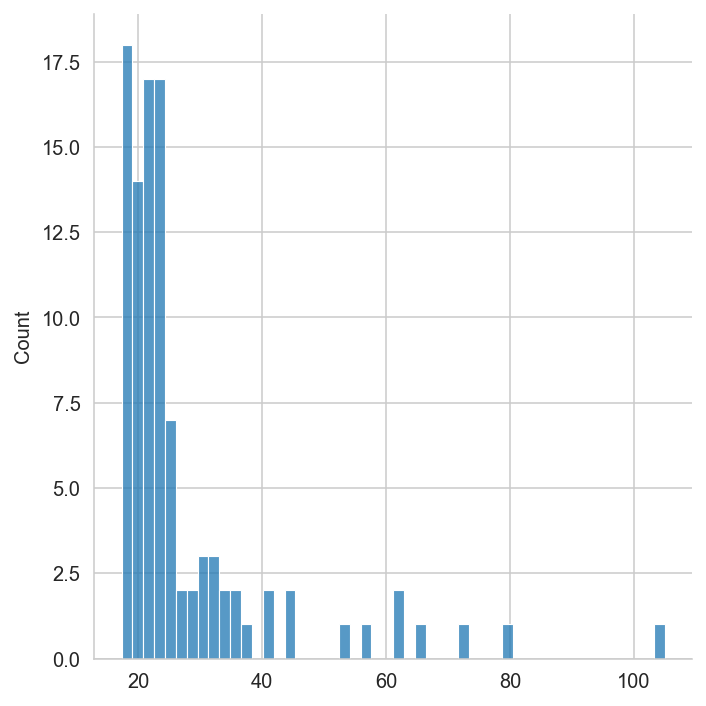

In [10]:
dist_plotter(salary)

We can infer from above distribution that `salary` variable is **not normally distributed**

Write a function that will take a random sample of size $n=30$ from this salary list 1000 times, calculate the means of the samples, and return the sample means as a new list.

*Hint: you can use `numpy`'s `np.random.choice` to perform your sampling.*

In [11]:
# we can use back the list comprehension used in continuous dist lesson and modify as below
salary_means = [np.mean(np.random.choice(salary, size=30)) for _ in range(1000)]
salary_means

[28.318333333333335,
 26.380000000000003,
 31.48666666666667,
 33.44616666666666,
 27.623333333333335,
 32.18,
 27.516166666666667,
 24.43166666666667,
 24.85666666666667,
 23.440000000000005,
 26.416666666666668,
 32.975,
 28.635666666666662,
 29.691666666666663,
 26.410000000000004,
 24.634999999999998,
 28.928333333333335,
 33.31,
 24.654999999999998,
 26.974999999999998,
 29.815666666666665,
 22.316166666666668,
 26.63,
 27.467833333333328,
 30.216666666666665,
 23.52,
 27.77,
 22.994999999999997,
 23.156166666666664,
 27.04833333333334,
 28.353999999999996,
 28.761666666666667,
 29.996666666666666,
 26.283333333333335,
 26.62833333333333,
 25.05566666666667,
 25.10616666666667,
 29.723333333333333,
 34.00166666666667,
 25.86733333333333,
 27.15666666666667,
 27.826666666666664,
 25.808333333333334,
 23.93616666666667,
 27.36283333333333,
 27.25166666666667,
 28.70116666666667,
 23.418333333333333,
 27.88166666666666,
 25.24616666666667,
 29.956666666666667,
 22.607333333333333,
 2

In [12]:
len(salary_means)

1000

In [12]:
# alternatively, we can define a custom function from scratch as below:
def sampler(population, n=30, k=1000):
    sample_means = []
    for i in range(k):
        sample = np.random.choice(population, size=n, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

In [13]:
# and get the salary means by calling the function as below
means = sampler(salary)
means

[30.62333333333333,
 25.09666666666667,
 28.74116666666667,
 25.32,
 26.201666666666668,
 27.498333333333335,
 25.71783333333334,
 24.250000000000004,
 29.523333333333326,
 28.25166666666666,
 25.03166666666666,
 29.826166666666666,
 30.06666666666667,
 24.931166666666666,
 31.453333333333337,
 29.045,
 27.401666666666674,
 27.134,
 22.47616666666666,
 22.016666666666666,
 27.99,
 23.92333333333333,
 25.303333333333338,
 27.863333333333333,
 27.368333333333332,
 26.551666666666662,
 26.12833333333333,
 26.40333333333333,
 32.36333333333333,
 28.95,
 28.423333333333336,
 31.015,
 30.179999999999996,
 31.261666666666667,
 26.740000000000002,
 27.05,
 24.426166666666667,
 28.88833333333333,
 26.73166666666667,
 31.71783333333333,
 28.184999999999995,
 26.577833333333334,
 24.101666666666667,
 25.09499999999999,
 28.42116666666666,
 25.617833333333333,
 27.956666666666667,
 25.866666666666664,
 29.00833333333333,
 26.33333333333333,
 30.944999999999997,
 28.628333333333337,
 31.08,
 24.017

**Plot the sample means using the distribution plotter function.**

Is the distribution of sample means approximately normally distributed? What happens if you increase the number of sample means to 10,000? 100,000?

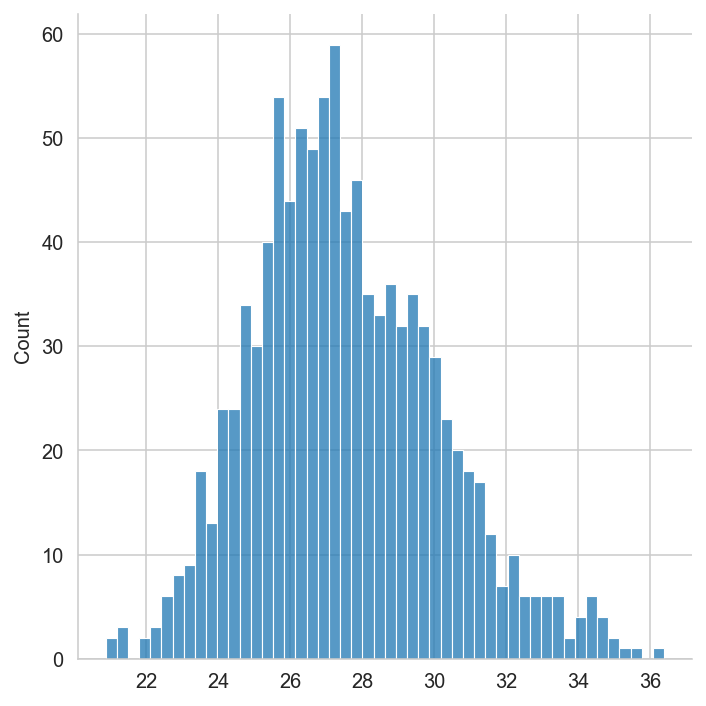

In [14]:
dist_plotter(salary_means)

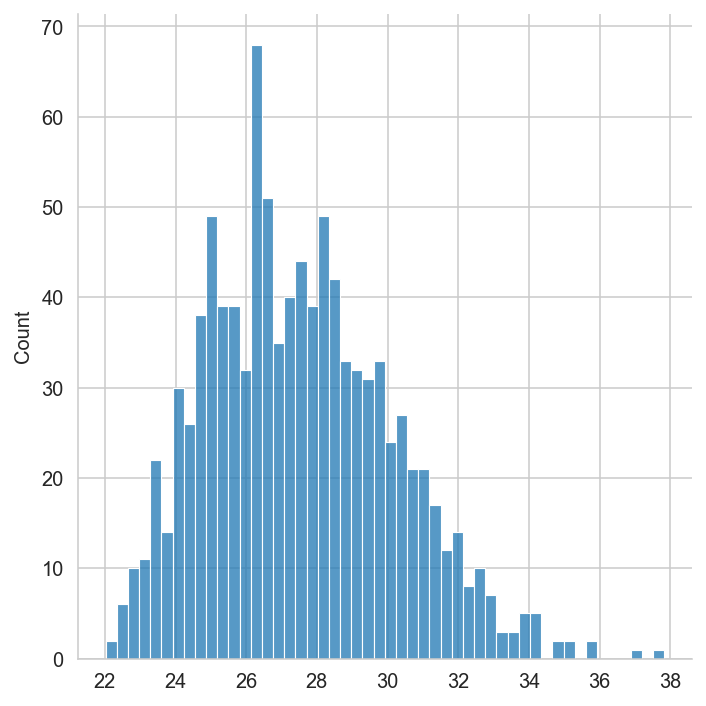

In [15]:
dist_plotter(means)

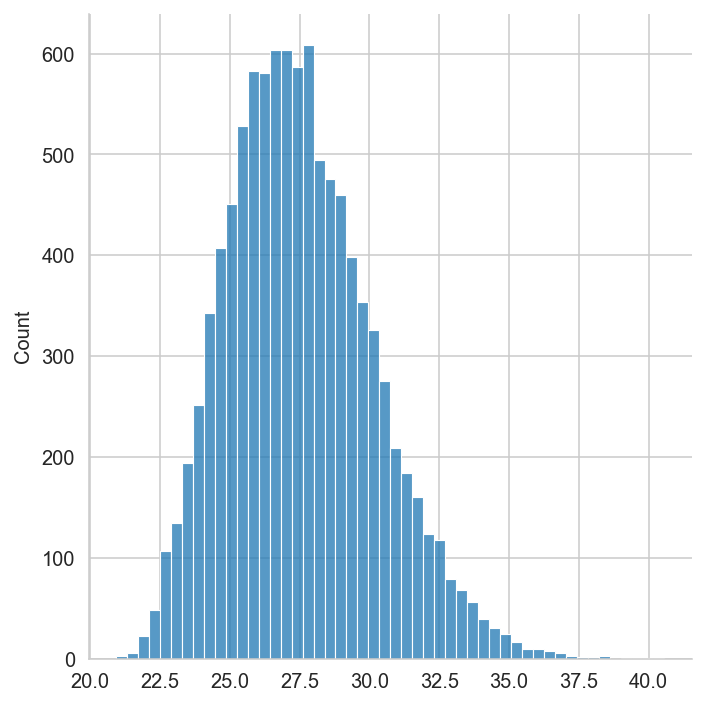

In [16]:
means2 = sampler(salary, k=10000)
dist_plotter(means2)

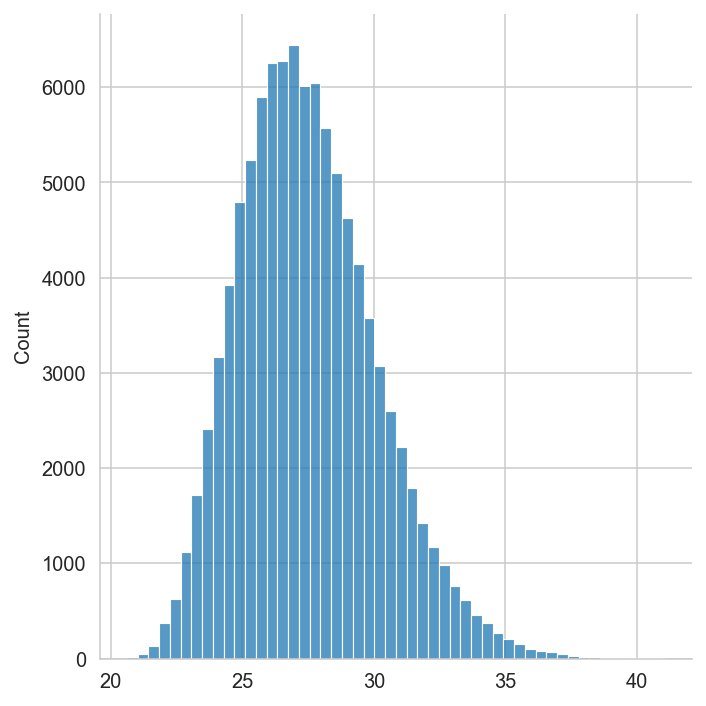

In [17]:
means3 = sampler(salary, k=100000)
dist_plotter(means3)

In [18]:
# looking at the avg salary and 1sigma std deviation
np.mean(means3), np.std(means3)

(27.500553564999997, 2.6111322679526006)

<a id='standard-error'></a>

### The Standard Error of a Statistic

---

If our goal extends beyond simply describing the data we have, and we instead want to infer something about the overall population based on the information in this sample, we will inherently have some degree of uncertainty.

**Uncertainty About the True Value**

Working within the Frequentist framework, we know that there is a *true value for the mean salary of athletes*. If we had surveyed *every single athlete and calculated the mean, then we would have that value: the true population mean. However, we have only measured 30 salaries at random, iterated 1000 times.* Depending on our sample size, **we will have some degree of uncertainty about how far off our statistic of our random sample is from the true parameter. This distance is our measurement "error."**

**The Mean vs. The Standard Deviation vs. The Standard Error**

It is important to frame these definitions in the context of *repeated measurements*. Furthermore, as Frequentists, we conceive of this sample as one of many hypothetical random samples from the same overall population. Let's start with our calculated statistic, the mean salary.

> **Mean:** Our sample mean salary is an estimate of the true mean salary of the overall population.

We also calculated the standard deviation of salaries in our sample.

> **Standard deviation:** This quantifies the spread of our data — i.e., the average distance of an observation from the mean. If we were to repeat a measurement, it would quantify our certainty about how far that salary will be from the mean salary.

Lastly, we have the **standard error of our mean**. Whereas the standard deviation is a measure of the spread of our data, **the standard error is a measure of spread in our calculated statistic**. In other words, the **standard error is the standard deviation of our statistic**.

> **Standard error:** If you had a new random sample of salaries that was the same size as the original, the standard error would quantify our certainty about how far the new sample mean would be from the original sample mean. 

The calculation for the standard error of the sample mean is (std dev of sample dist) / sqrt(sample size):

### $$ SE_{\bar{x}} = \frac{s_{x}}{\sqrt{n}} $$

Here, $s_{x}$ is the sample standard deviation and $n$ is the sample size.

To recap:

- We want to investigate random variable, $x$ (salary).
- There is a "true" population mean, $\mu$ (mean salary for all athletes).
- We collect a sample and calculate the sample mean, $\bar{x}$ (mean salary for the athletes we queried).
- The sample mean ($\bar{x}$) is a random variable!  It therefore has an associated probability distribution.
- The probability distribution of the sample mean is called the *sampling distribution*.
- If the sample size is large enough, the sampling distribution will be approximately a normal distribution. (This is called the central limit theorem.)
- **The standard deviation of the sampling distribution is called the *standard error*.**
- The standard deviation (SD) measures the amount of variability, or dispersion, from the individual data values to the mean, while the standard error of the mean (SEM) measures how far the sample mean (average) of the data is likely to be from the true population mean

**Now, let's manually calculate the standard error of the sample mean for our salaries.**

### If the above is still confusing, let's [read this article](https://towardsdatascience.com/standard-deviation-vs-standard-error-5210e3bc9c04) that simplifies the difference between standard deviation and standard error

In [19]:
n = 30 # same sample size as before
standard_error = np.std(salary, ddof=1)/np.sqrt(n) 

print('Standard error = ', standard_error)
print('Simulation estimate = ', np.std(means3)) # what we already did above

Standard error =  2.6250747972508544
Simulation estimate =  2.6111322679526006


#### Notes: 
- ddof (delta degree of freedom) from numpy documentation
- pstdev--> population standard deviation. ddof = 0
- sample std dev --> The sample std dev, on the other hand, has ddof = 1
    - [stackoverflow](https://stackoverflow.com/questions/59186752/np-stdddof-1-and-statistics-pstdev-given-different-answers)  
    - [numpy doc](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

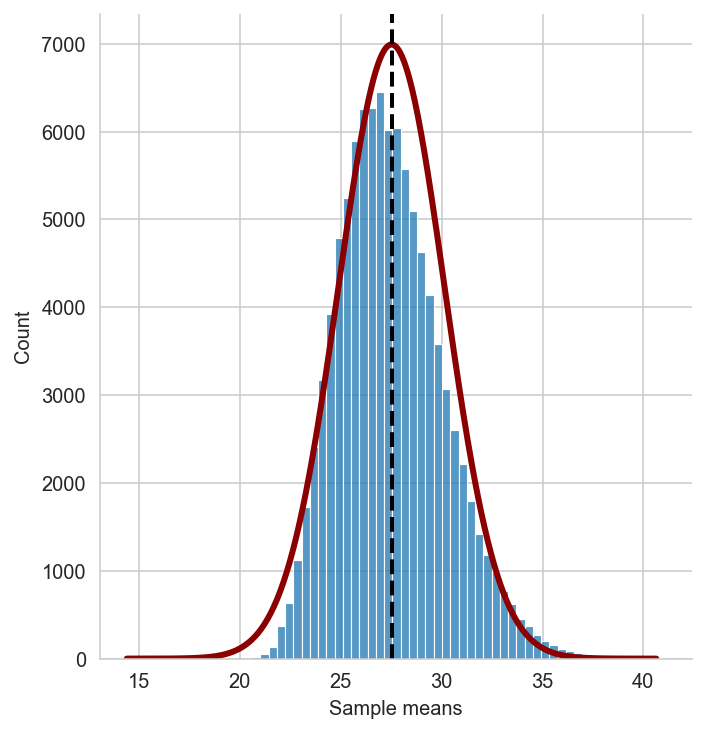

In [20]:
mean_salary = np.mean(salary) # true value for the mean salary of ALL athletes

dist_plotter(means3)

xpoints = np.linspace(mean_salary - 5*standard_error, mean_salary + 5*standard_error, 501)
# linspace Returns `num` evenly spaced samples, calculated over the interval [`start`, `stop`]
# start, stop is +/- 5 Standard Error from true salary mean. +/-5 to cover a wider distribution

ypoints = stats.norm.pdf(xpoints, mean_salary, standard_error) # normal probability density function
ax = plt.gca() # Get the current Axes instance on the current figure to add further customizations as below
ax.plot(xpoints, ypoints*46000, linewidth=3, color='darkred')
ax.axvline(mean_salary, linewidth=2, ls='dashed', c='black')
ax.set_xlabel('Sample means');

As we can infer, the statistic of our random sample is not far off from the true parameter

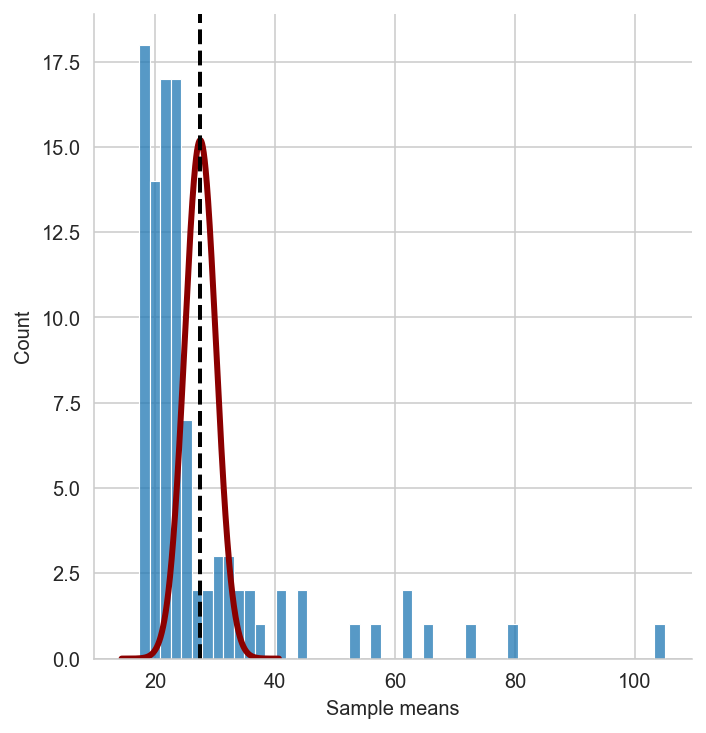

In [21]:
dist_plotter(salary)

xpoints = np.linspace(mean_salary - 5*standard_error, mean_salary + 5*standard_error, 501)
ypoints = stats.norm.pdf(xpoints, mean_salary, standard_error)
ax = plt.gca()
ax.plot(xpoints, ypoints*100, linewidth=3, color='darkred')
ax.axvline(mean_salary, linewidth=2, ls='dashed', c='black')
ax.set_xlabel('Sample means');

<a id='additional-resources'></a>

### Additional resources

---

http://blog.vctr.me/posts/central-limit-theorem.html

http://www.usablestats.com/lessons/central_limit

http://blog.minitab.com/blog/michelle-paret/explaining-the-central-limit-theorem-with-bunnies-and-dragons-v2
